# Meent Tutorial 1
 Modeling and Electromagnetic simulation

In [2]:
import time

import matplotlib.pyplot as plt
import numpy as np

import meent

In [3]:
pol = 0  # 0: TE, 1: TM

n_top = 1  # n_superstrate
n_bot = 1  # n_substrate

theta = 20 * np.pi / 180
phi = 50 * np.pi / 180

wavelength = 900

thickness = [500]
period = [1000]

fto = [30]

type_complex = np.complex128


## 1.1 Modeling

### ucell (unit cell)

ucell (unit cell) is a 3-dimensional array which has refractive index elements. It supports complex index, 2-dimensional grating and multi-layered structures.

The order of dimensions: Z Y X.


        ______________________
       |\                     \
       | \                     \  Y
       |  \                     \
       |\  \_____________________\
       | \ |      Layer 1        |
       \  \|_____________________|
        \  |                     | Z
         \ |      Layer 2        |
          \|_____________________|
                     X

* Z: Stack of the layers (1st axis of ucell)
   * In z-direction, layers (2D arrays) are stacked from top to bottom.
   * For example, ucell[0] is Layer 1 in the figure (2D array on the top) and ucell[1] is the next layer below.
* Y: Depth of the structure (2nd axis of ucell)
    * 2 dimensional grating is implemented on this and the last axes.
    * For 1 dimensional case, this is not used and fixed to 1.

* X: Width of the structure (3rd axis of ucell)
    * This is the default axis. 1 dimensional grating is implemented on this axis.



#### ucell examples

In [4]:
ucell_1d_s = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
    ],
]) * 4 + 1  # refractive index

1D grating, single layer

In [5]:
ucell_1d_m = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
    ],
    [
        [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, ],
    ],
    [
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, ],
    ],
]) * 4 + 1  # refractive index

1D grating, multi layer

In [6]:
ucell_2d_s = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ],
    ],
]) * 4 + 1  # refractive index

2D grating, single layer

In [7]:
ucell_2d_m = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ],
    ],
    [
        [1, 1, 0, 1, 1, 0, 1, 0, 2, 1, ],
        [0, 1, 1, 1, 2, 4, 1, 0, 1, 1, ],
    ],
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 2, 0, 1, 2, 0, 1, 1, ],
    ],
    [
        [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ],
        [0, 1, 3, 1, 1, 1, 1, 1, 1, 1, ],
    ],
]) * 4 + 1  # refractive index

2D grating, multi layer

### Wave

#### $\theta$: angle of incidence


          Incidence   normal
               \\      |
                \\     |
                 \\ 𝜃 (angle of incidence)     
                  \\   |
                   \\  |             
                    \\ |
                     \\|                       Z-axis
     ____________________________________        |
    |              Layer 1               |       |
    |____________________________________|       |_____ X-axis

#### $\phi$: azimuthal (rotation) angle

    



            plane of incidence
              |     \
              |      \
              |       \
              |        \
              |         \
              |          \
              |           \
               \           \
           /    \           \                 /
          /      \           \               / 
         / -------\---------- \             /              
        /          \ 𝜙 (rotation angle)    /  /          Z-axis  
       /            \          |          /  /            |
      /______________\_________|_________/  / /           |
      |   Layer 1     \        |         | / /            |_____ X-axis
      |________________\_______|_________|/ /            /
      |   Layer 2       \      |         | /            /
      |__________________\_____|_________|/           Y-axis
                          \    |                     
                   



  In 2D (projection on XY-plane),
  
     |
     |
     |--------------- X-axis
     |\\ 𝜙 (rotation angle)
     | \\
     |  \\
     |   \\
     |    \\
     |     \\
     Y     Incidence
    axis
    

## 1.2 EM Simulation

In [22]:
mee = meent.call_mee(backend=0, 
                     pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, fto=fto, 
                     wavelength=wavelength, period=period, ucell=ucell_1d_s, thickness=thickness,
                       type_complex=type_complex)

call meent operator by `meent.call_mee`.
Here, backend can be selected with keyword `backend`

```python
backend = 0  # Numpy backend
backend = 1  # JAX backend
backend = 2  # PyTorch backend
```


### Case 1: 1D TE/TM
For 1D TE or TM case, fast calculation can be achieved.
Setting phi as `None` (which is default). 

This returns result of either TE or TM while the general case does both.

In [8]:
mee = meent.call_mee(backend=0, pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, fto=fto, 
                     wavelength=wavelength, period=period, ucell=ucell_1d_s, thickness=thickness,
                       type_complex=type_complex)
mee.fto = [200]
mee.pol = 0 # 0 or 1. Other values will be operated in General form.
mee.phi = None  # None is by default. This explicit assign is for demo.

result = mee.conv_solve()

For 1D TE/TM, the result is in `res` in `result`.

In [9]:
res = result.res
de_ri = res.de_ri
de_ti = res.de_ti
print('Diffraction efficiency: ', de_ri.sum(), de_ti.sum())


Diffraction efficiency:  0.8028173479774741 0.19718265202260613


### Case 2: General
General form includes 1D grating with non TE or TM input, 1D conical and 2D gratings.

This returns 3 results: result from given polarization(or psi), result from TE incidence, and result from TM incidence.

In [10]:
mee = meent.call_mee(backend=0, pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, phi=phi, fto=fto, 
                     wavelength=wavelength, period=period, ucell=ucell_1d_s, thickness=thickness,
                       type_complex=type_complex)
mee.fto = [200]
mee.pol = 0.5 
mee.phi = 30

result = mee.conv_solve()


The return `result` has 3 sub-result classes each of which contains: result for given polarization (or psi), for TE incidence and for TM incidence.

In [11]:
res = result.res
res_te_inc = result.res_te_inc
res_tm_inc = result.res_tm_inc

de_ri, de_ti = res.de_ri, res.de_ti
de_ri_te, de_ti_te = res_te_inc.de_ri, res_te_inc.de_ti
de_ri_tm, de_ti_tm = res_tm_inc.de_ri, res_tm_inc.de_ti

print('Diffraction efficiency: ', de_ri.sum(), de_ti.sum())
print('Diffraction efficiency: ', de_ri_te.sum(), de_ti_te.sum())
print('Diffraction efficiency: ', de_ri_tm.sum(), de_ti_tm.sum())


Diffraction efficiency:  0.6154849015525773 0.3845150984544151
Diffraction efficiency:  0.13853479697001853 0.8614652030395099
Diffraction efficiency:  0.7254065902537097 0.2745934097456641


call meent operator by `meent.call_mee`.
Here, backend can be selected with keyword `backend`

```python
backend = 0  # Numpy backend
backend = 1  # JAX backend
backend = 2  # PyTorch backend
```


## 1.3 RCWA Result

In [12]:
fto = [4, 2]
thickness = [100, 200, 400, 245]
period = [1000, 2000]

ucell_2d_m = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ],
    ],
    [
        [1, 1, 0, 1, 1, 0, 1, 0, 2, 1, ],
        [0, 1, 1, 1, 2, 4, 1, 0, 1, 1, ],
    ],
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 2, 0, 1, 2, 0, 1, 1, ],
    ],
    [
        [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ],
        [0, 1, 3, 1, 1, 1, 1, 1, 1, 1, ],
    ],
]) * 4 + 1  # refractive index


In [13]:
mee = meent.call_mee(backend=0, pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, phi=phi,
                      fto=fto, wavelength=wavelength, period=period, ucell=ucell_2d_m, 
                      thickness=thickness, type_complex=type_complex)
mee.pol = 0.5

result = mee.conv_solve()

res = result.res
res_te_inc = result.res_te_inc
res_tm_inc = result.res_tm_inc

### RCWA result

In [14]:
attrs = vars(res)
print(', '.join("%s" % item for item in attrs))


R_s, R_p, T_s, T_p, de_ri, de_ri_s, de_ri_p, de_ti, de_ti_s, de_ti_p


Attributes of subresult instance.


R_s: reflectivity coefficient (Rayleigh coefficient) from TE component <br>
R_p: reflectivity coefficient (Rayleigh coefficient) from TM component <br>
T_s: transmittivity coefficient (Rayleigh coefficient) from TE component <br>
T_p: transmittivity coefficient (Rayleigh coefficient) from TM component <br>
de_ri: diffraction efficiency of reflection in total <br>
de_ri_s: diffraction efficiency of reflection from TE component <br>
de_ri_p: diffraction efficiency of reflection from TM component <br>
de_ti: diffraction efficiency of transmission in total <br>
de_ti_s: diffraction efficiency of transmission from TE component <br>
de_ti_p: diffraction efficiency of transmission from TM component <br>



### Diffraction Efficiency


      Incidence      Backward Diffraction 
                         (Reflected)
         ||               
         ||          -1th    0th    +1th
         ||          order  order   order
         ||             \     |     /
         ||          ... \    |    / ...
         ||               \   |   /   
         ||                \  |  /    n_top:refractive index of superstrate
     ____________________________________
    |              Layer 1               |
    |____________________________________|
                       .                        z-axis 
                       .                           |
                       .                           |
     ____________________________________          |_____ x-axis 
    |              Layer N               |
    |____________________________________|
                                     n_bot:refractive index of substrate
                           /  |  \    
                          /   |   \
                    ...  /    |    \  ...
                        /     |     \
               -2nd   -1th   0th    +1th   +2th
              order  order  order  order  order
              
                     Forward Diffraction 
                        (Transmitted)   

## 1.4 Field construction result

### 1D TE

In [15]:
pol = 0  # 0: TE, 1: TM

n_top = 1  # n_superstrate
n_bot = 1  # n_substrate

theta = 20 * np.pi / 180
phi = 50 * np.pi / 180

wavelength = 900

thickness = [500]
period = [1000]

fto = [30]

type_complex = np.complex128

mee = meent.call_mee(backend=0, pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, fto=fto, 
                     wavelength=wavelength, period=period, ucell=ucell_1d_s, thickness=thickness,
                       type_complex=type_complex)

result, field_cell = mee.conv_solve_field(res_z=100, res_y=1, res_x=100)

ZX direction (Side View)

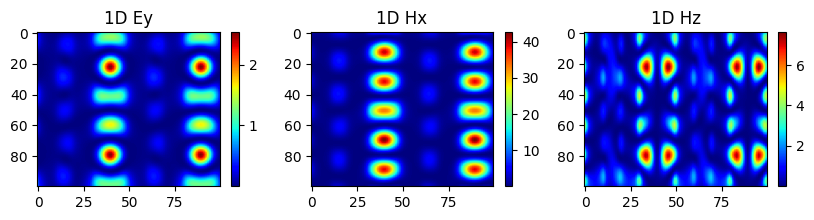

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10,2))
if pol == 0:  # TE
    title = ['1D Ey', '1D Hx', '1D Hz', ]
else:  # TM
    title = ['1D Hy', '1D Ex', '1D Ez', ]

for ix in range(len(title)):
    val = abs(field_cell[:, 0, :, ix]) ** 2
    im = axes[ix].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix], shrink=1)
    axes[ix].title.set_text(title[ix])

plt.show()

### 1D TM

In [17]:
pol = 1  # 0: TE, 1: TM

n_top = 1  # n_superstrate
n_bot = 1  # n_substrate

theta = 20 * np.pi / 180
phi = 50 * np.pi / 180

wavelength = 900

thickness = [500]
period = [1000]

fto = [30]

type_complex = np.complex128

mee = meent.call_mee(backend=0, pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, fto=fto, 
                     wavelength=wavelength, period=period, ucell=ucell_1d_s, thickness=thickness,
                       type_complex=type_complex)

result, field_cell = mee.conv_solve_field(res_z=100, res_y=1, res_x=100)

ZX direction (Side View)

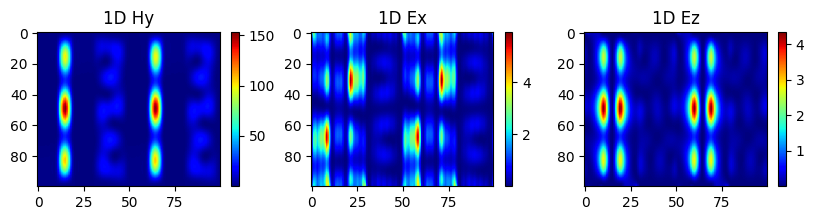

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10,2))
if pol == 0:  # TE
    title = ['1D Ey', '1D Hx', '1D Hz', ]
else:  # TM
    title = ['1D Hy', '1D Ex', '1D Ez', ]

for ix in range(len(title)):
    val = abs(field_cell[:, 0, :, ix]) ** 2
    im = axes[ix].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix], shrink=1)
    axes[ix].title.set_text(title[ix])

plt.show()

### 2D

In [19]:
fto = [4, 2]
thickness = [100, 200, 400, 245]
period = [1000, 2000]

ucell_2d_m = np.array([
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ],
    ],
    [
        [1, 1, 0, 1, 1, 0, 1, 0, 2, 1, ],
        [0, 1, 1, 1, 2, 4, 1, 0, 1, 1, ],
    ],
    [
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ],
        [1, 1, 1, 2, 0, 1, 2, 0, 1, 1, ],
    ],
    [
        [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, ],
        [0, 1, 3, 1, 1, 1, 1, 1, 1, 1, ],
    ],
]) * 4 + 1  # refractive index

mee = meent.call_mee(backend=0, pol=pol, n_top=n_top, n_bot=n_bot, theta=theta, phi=phi,
                      fto=fto, wavelength=wavelength, period=period, ucell=ucell_2d_m, 
                      thickness=thickness, type_complex=type_complex)
result, field_cell = mee.conv_solve_field(res_z=100, res_y=100, res_x=100)


ZX direction (Side View)

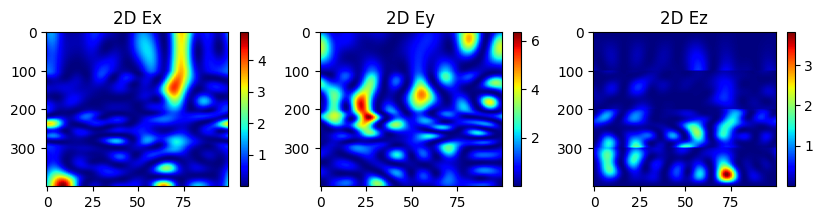

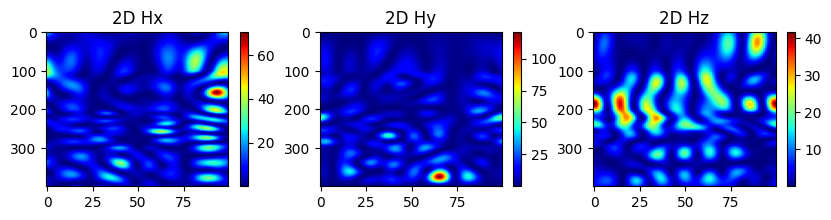

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 2))
title = ['2D Ex', '2D Ey', '2D Ez', '2D Hx', '2D Hy', '2D Hz', ]

for ix in range(3):
    val = abs(field_cell[:, 0, :, ix]) ** 2
    im = axes[ix].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix], shrink=1)
    axes[ix].title.set_text(title[ix])

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(10, 2))
for ix in range(3, 6, 1):
    val = abs(field_cell[:, 0, :, ix]) ** 2
    im = axes[ix-3].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix-3], shrink=1)
    axes[ix-3].title.set_text(title[ix])

plt.show()

#### YZ Direction (Top View)

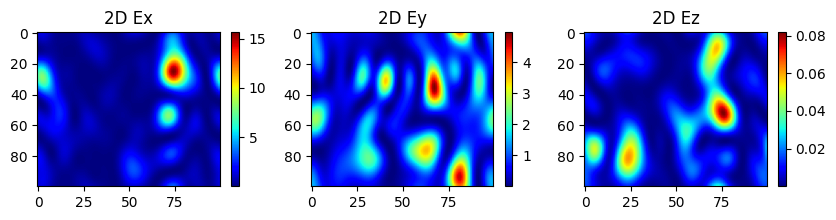

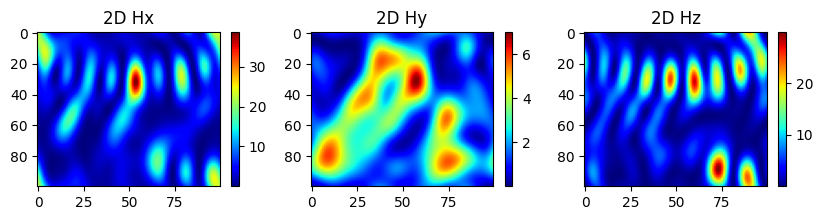

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 2))
title = ['2D Ex', '2D Ey', '2D Ez', '2D Hx', '2D Hy', '2D Hz', ]

for ix in range(3):
    val = abs(field_cell[0, :, :, ix]) ** 2
    im = axes[ix].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix], shrink=1)
    axes[ix].title.set_text(title[ix])

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(10, 2))
for ix in range(3, 6, 1):
    val = abs(field_cell[0, :, :, ix]) ** 2
    im = axes[ix-3].imshow(val, cmap='jet', aspect='auto')
    # plt.clim(0, 2)  # identical to caxis([-4,4]) in MATLAB
    fig.colorbar(im, ax=axes[ix-3], shrink=1)
    axes[ix-3].title.set_text(title[ix])

plt.show()